# Модуль 12: Работа с наборами (Sets)

**Тема: Использование наборов в формулах
Цель**: Научить создавать наборы в Tableau с помощью формул и использовать их для условных вычислений, чтобы строить гибкие и динамичные дашборды.

## Теория
**Что такое наборы (Sets)?**
Наборы — это как твой список избранных данных в Tableau. Ты выбираешь, какие данные включить (например, топ-5 клиентов или регионы с высокой прибылью), и можешь использовать этот список в формулах или дашборде. Наборы делят данные на две группы: **In** (в наборе) и **Out** (вне набора). Они круты тем, что автоматически обновляются, если данные меняются, и позволяют сравнивать выбранные данные с остальными.
**Как создавать наборы?**  
* В панели Data щёлкни правой кнопкой на измерение (например, [Customer Name]) → **Create Set**.  
* Дай имя набору (например, "Топ-5 клиентов").  
* Выбери, как определить набор:  
  * **By condition**: Пишешь формулу, например, SUM([Sales]) > 1000.  
  * **By formula**: Задаёшь топ-N или другие условия, например, RANK(SUM([Sales])) <= 5.  
  * **Manual selection**: Выбираешь значения вручную (например, "Anna", "Bob").
* Набор появится в панели Data с иконкой круга.

⠀**Как использовать наборы?**  
* **В фильтрах**: Перетащи набор в область Filters и выбери In (данные в наборе) или Out (данные вне набора).  
* **В формулах**: Пиши формулу, например, IF [Топ-5 клиентов] THEN [Sales] ELSE 0 END, чтобы выделить данные набора.  
* **В визуализациях**: Добавляй набор в Rows, Columns или для цвета, чтобы показать In/Out.

⠀**Как наборы работают с фильтрами?**  
* **Фильтры в рабочем листе**: Наборы применяются *после* обычных фильтров в дашборде. Если стоит фильтр [Year] = 2025, набор (например, топ-5 клиентов) выберет клиентов только из данных за 2025 год.  
* **Фильтры на уровне Data Source**: Наборы учитывают фильтры, заданные в Data Source или Extract. Если в Data Source фильтр [Order Date] = 2025, набор будет работать только с этими данными.  
* **Фильтры табличных вычислений**: Если набор использует табличное вычисление (например, RANK), можно настроить фильтр табличного вычисления, чтобы показать только часть набора (например, топ-3 из топ-5).  
* **Совет**: Всегда проверяй фильтры в Data Source, чтобы знать, какие данные доступны для набора.

⠀**Сравнение наборов с фильтрами и сегментацией**  
| **Что сравниваем** | **Наборы** | **Условные фильтры и сегментация** |
|:-:|:-:|:-:|
| **Что делает?** | Создаёт группу данных (например, топ-клиенты), которую можно сравнить с остальными. | Фильтры убирают ненужные данные, сегментация делит данные на категории (см. Модуль 11). |
| **Как выглядит?** | Делит данные на In (в наборе) и Out (вне набора) в таблице или графике. | Фильтры скрывают данные, сегменты создают новое измерение (например, "VIP"). |
| **Зачем нужен?** | Чтобы сравнить выбранные данные с остальными (например, продажи топ-клиентов vs другие). | Чтобы убрать лишнее (фильтры) или сгруппировать (сегментация). |
| **Пример** | Показать продажи топ-5 клиентов и сравнить с общими продажами. | Показать продажи > 1000 или разделить клиентов на VIP/Обычные. |
**Почему это важно?**
Наборы — это как твой персональный фильтр, который не просто убирает данные, а создаёт группу, с которой ты можешь работать в формулах или дашборде. Они позволяют выделить важное (например, лучших клиентов или прибыльные регионы) и сравнить с остальным, не перестраивая весь отчёт. Наборы делают анализ гибким и понятным, особенно когда нужно показать, чем топ отличается от остальных.

## Примеры с таблицами
**Исходная таблица базы данных** (Superstore):  
| Order ID | Category | Region | Customer Name | Order Date | Sales | Profit |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | Technology | West | Anna | 2025-01-01 | 1000 | 200 |
| 2 | Technology | East | Anna | 2025-02-25 | 2000 | 400 |
| 3 | Furniture | West | Bob | 2025-01-15 | 1500 | 300 |
| 4 | Furniture | East | Bob | 2025-03-01 | 500 | -50 |
| 5 | Technology | West | Charlie | 2025-01-10 | 800 | 100 |
* **Набор: Топ-2 клиента по продажам**  
  * **Условие**: Хотим выделить двух клиентов с наибольшими продажами и видеть их продажи отдельно.  
  * **Что делаем**:  
    * Щёлкаем на [Customer Name] → Create Set → "Топ-2 клиентов".  
    * Вкладка Top → By field → Top 2 → SUM([Sales]).
    *  
    * 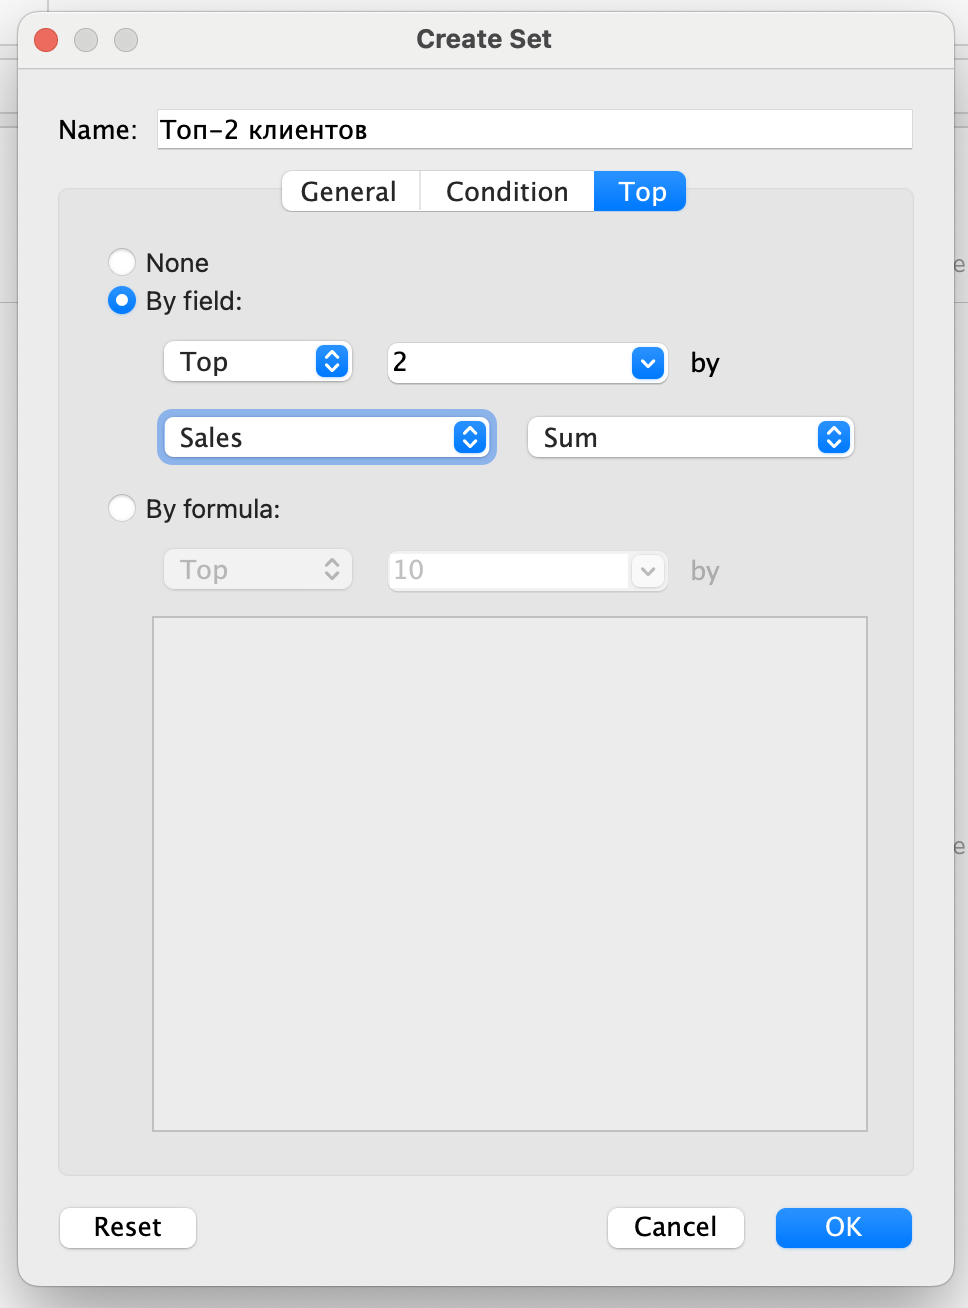
    * 
    * Создаём вычисляемое поле:   IF [Топ-2 клиентов] THEN [Sales] ELSE 0 END // Продажи топ-2 клиентов
  * **Как работает**: Tableau выбирает двух клиентов с самыми большими продажами (Anna: 3000, Bob: 2000) и показывает их продажи, обнуляя остальных.  
  * **Пример**: Набор включает Anna и Bob.  
**Итоговая таблица** (визуализация с [Customer Name]):  
| Customer Name | SUM([Sales]) | IF [Топ-2 клиентов] THEN [Sales] ELSE 0 END |
|:-:|:-:|:-:|
| Anna | 3000 | 3000 |
| Bob | 2000 | 2000 |
| Charlie | 800 | 0 |
**Что получаем**: Продажи для Anna и Bob, Charlie обнулён. Если в Data Source фильтр [Order Date] = 2025-01, Bob (1500) может выбыть из топ-2.

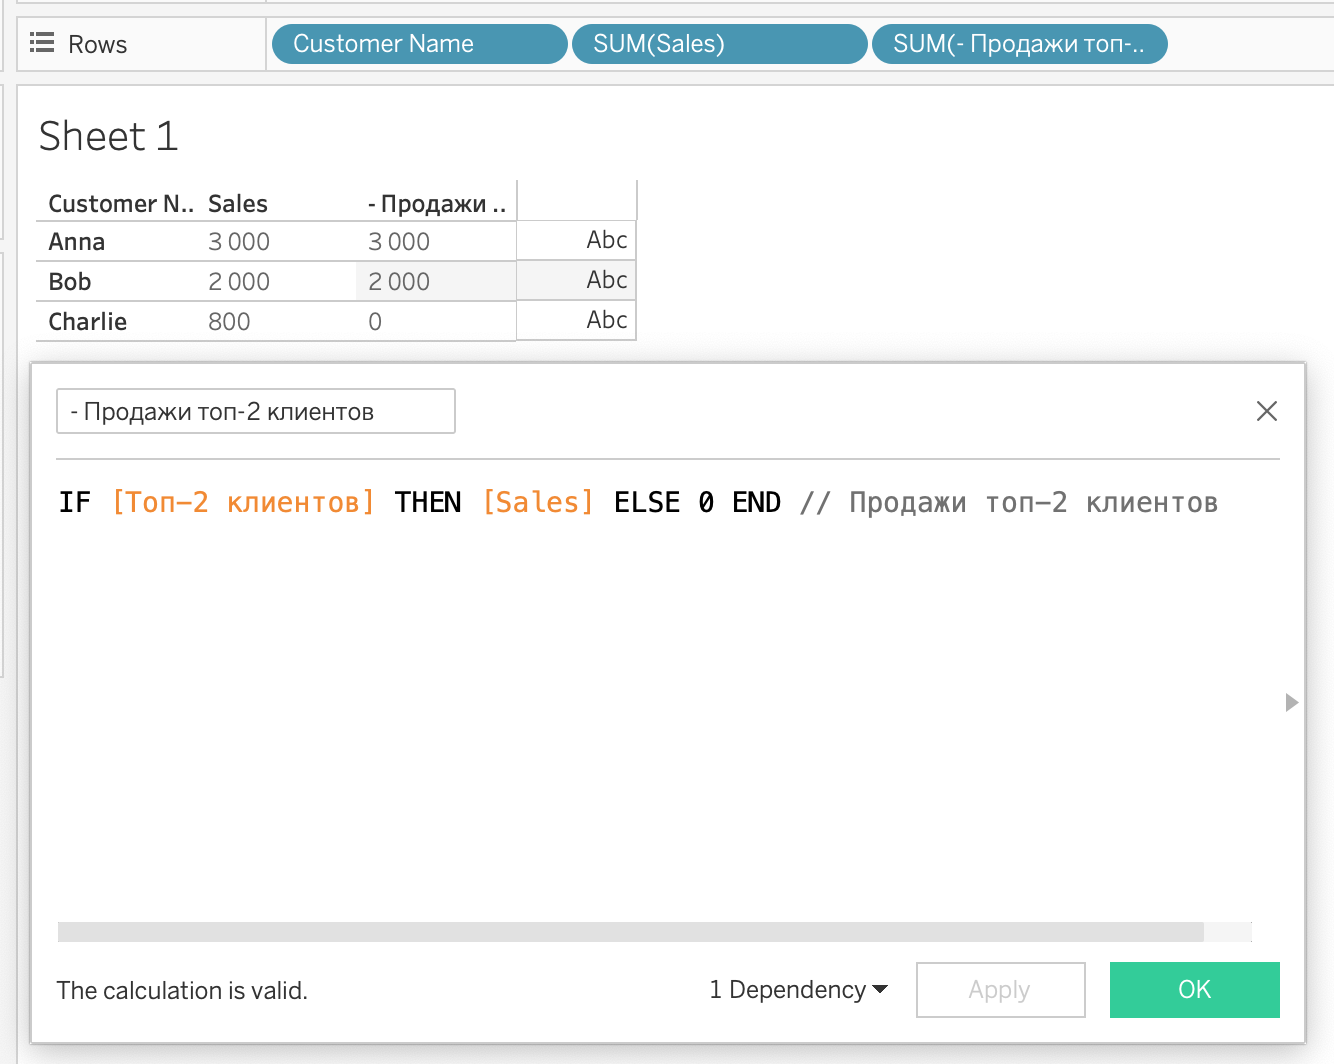

* **Набор: Регионы с прибылью выше 300**  
  * **Условие**: Хотим выделить регионы, где прибыль больше 300, и показать их продажи.  
  * **Что делаем**:  
    * Щёлкаем на [Region] → Create Set → "Прибыльные регионы".  
    * Вкладка Condition → By formula → SUM([Profit]) > 300.
    * 
    * 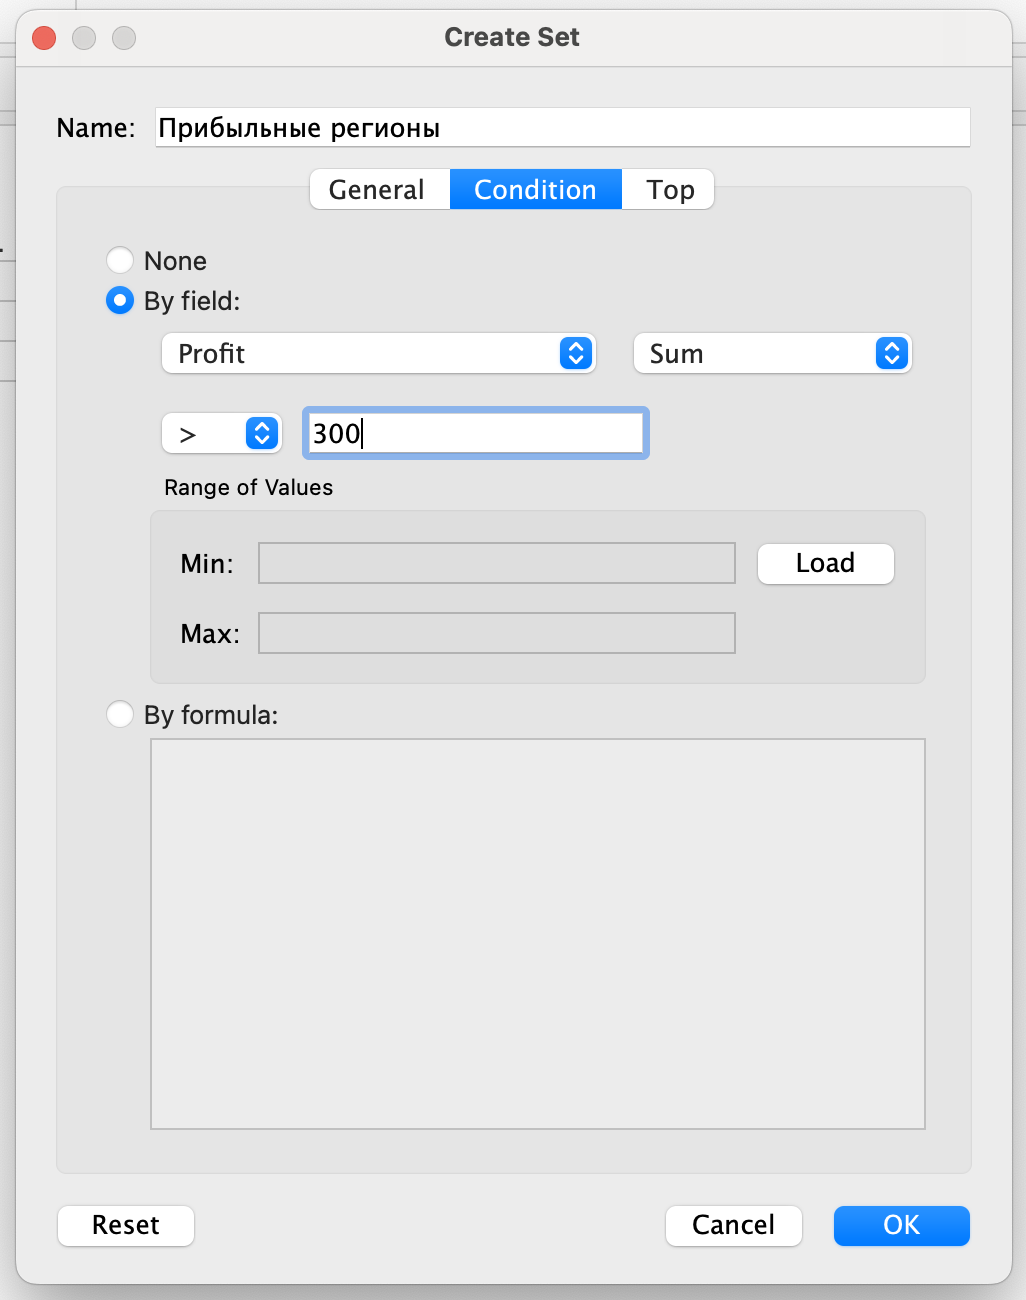
    * 
    * Создаём вычисляемое поле:   IF ATTR([Прибыльные регионы]) THEN SUM([Sales]) ELSE 0 END // Продажи прибыльных регионов
  * **Как работает**: Tableau проверяет прибыль регионов и включает те, где она > 300.  
  * **Пример**: West (500), East (350).  
**Итоговая таблица** (визуализация с [Region]):  
| Region | SUM([Sales]) | IF [Прибыльные регионы] THEN SUM([Sales]) ELSE 0 END |
|:-:|:-:|:-:|
| West | 3300 | 3300 |
| East | 2500 | 2500 |
**Что получаем**: Продажи для West и East, так как их прибыль > 300.

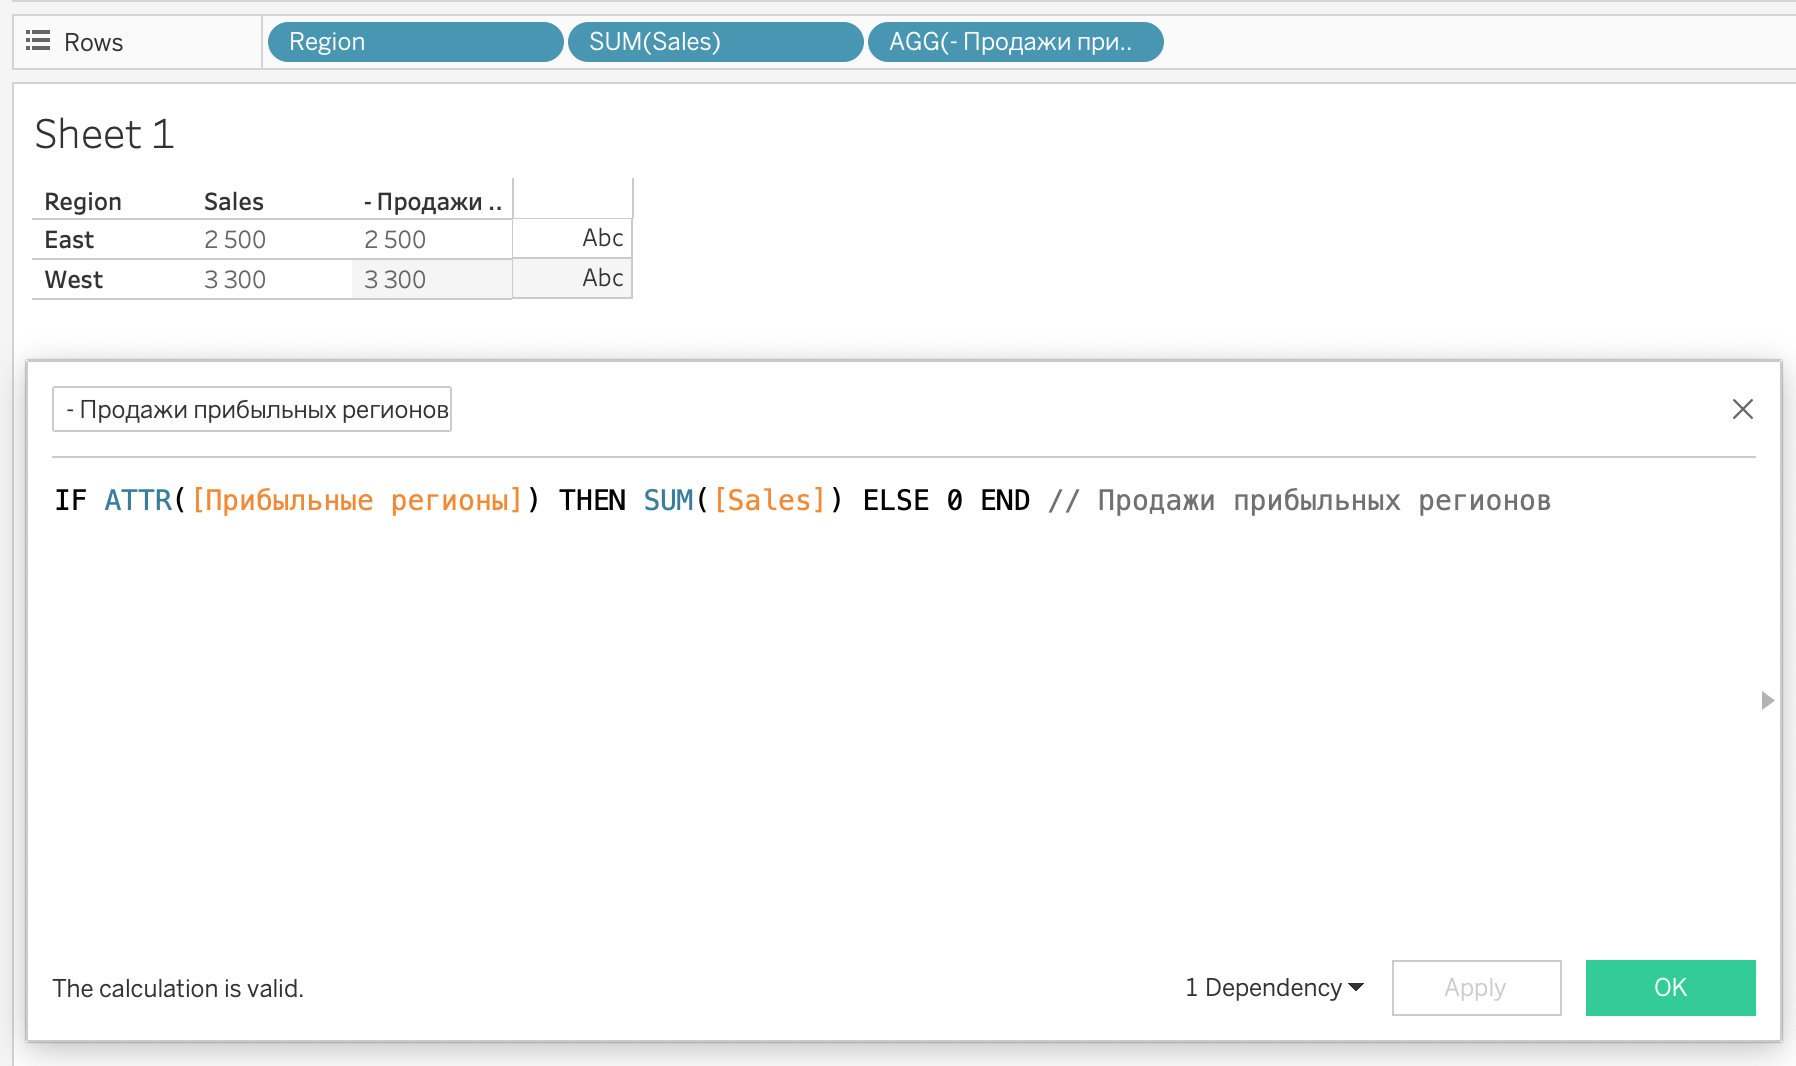

* **Набор: Категории с высокими продажами**  
  * **Условие**: Хотим выделить категории с продажами выше 2000 и показать их прибыль.  
  * **Что делаем**:  
    * Щёлкаем на [Category] → Create Set → "Высокие продажи".  
    * Вкладка Condition → By formula → SUM([Sales]) > 2000.
    *   
    * 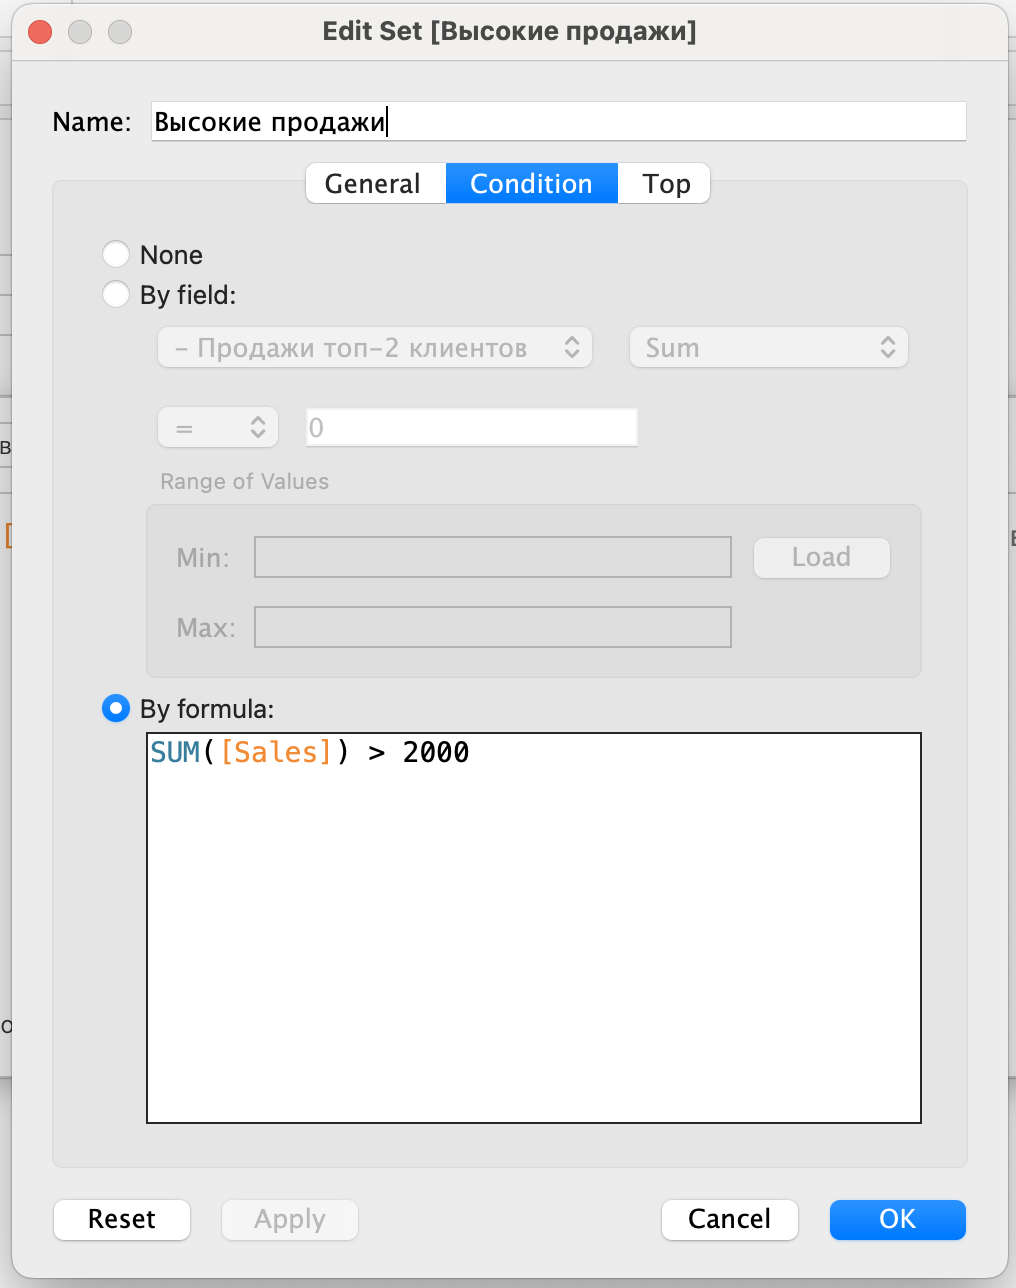
    * 
    * Создаём вычисляемое поле:   IF [Высокие продажи] THEN SUM([Profit]) ELSE 0 END // Прибыль высоких продаж
  * **Как работает**: Tableau выбирает категории с продажами > 2000 и показывает их прибыль.  
  * **Пример**: Technology (3000).  
**Итоговая таблица** (визуализация с [Category]):  
| Category   | SUM([Sales]) | IF [Высокие продажи] THEN SUM([Profit]) ELSE 0 END |
|:----------:|:------------:|:--------------------------------------------------:|
| Technology | 3800         | 700                                                |
| Furniture  | 2000         | 0                                                  |

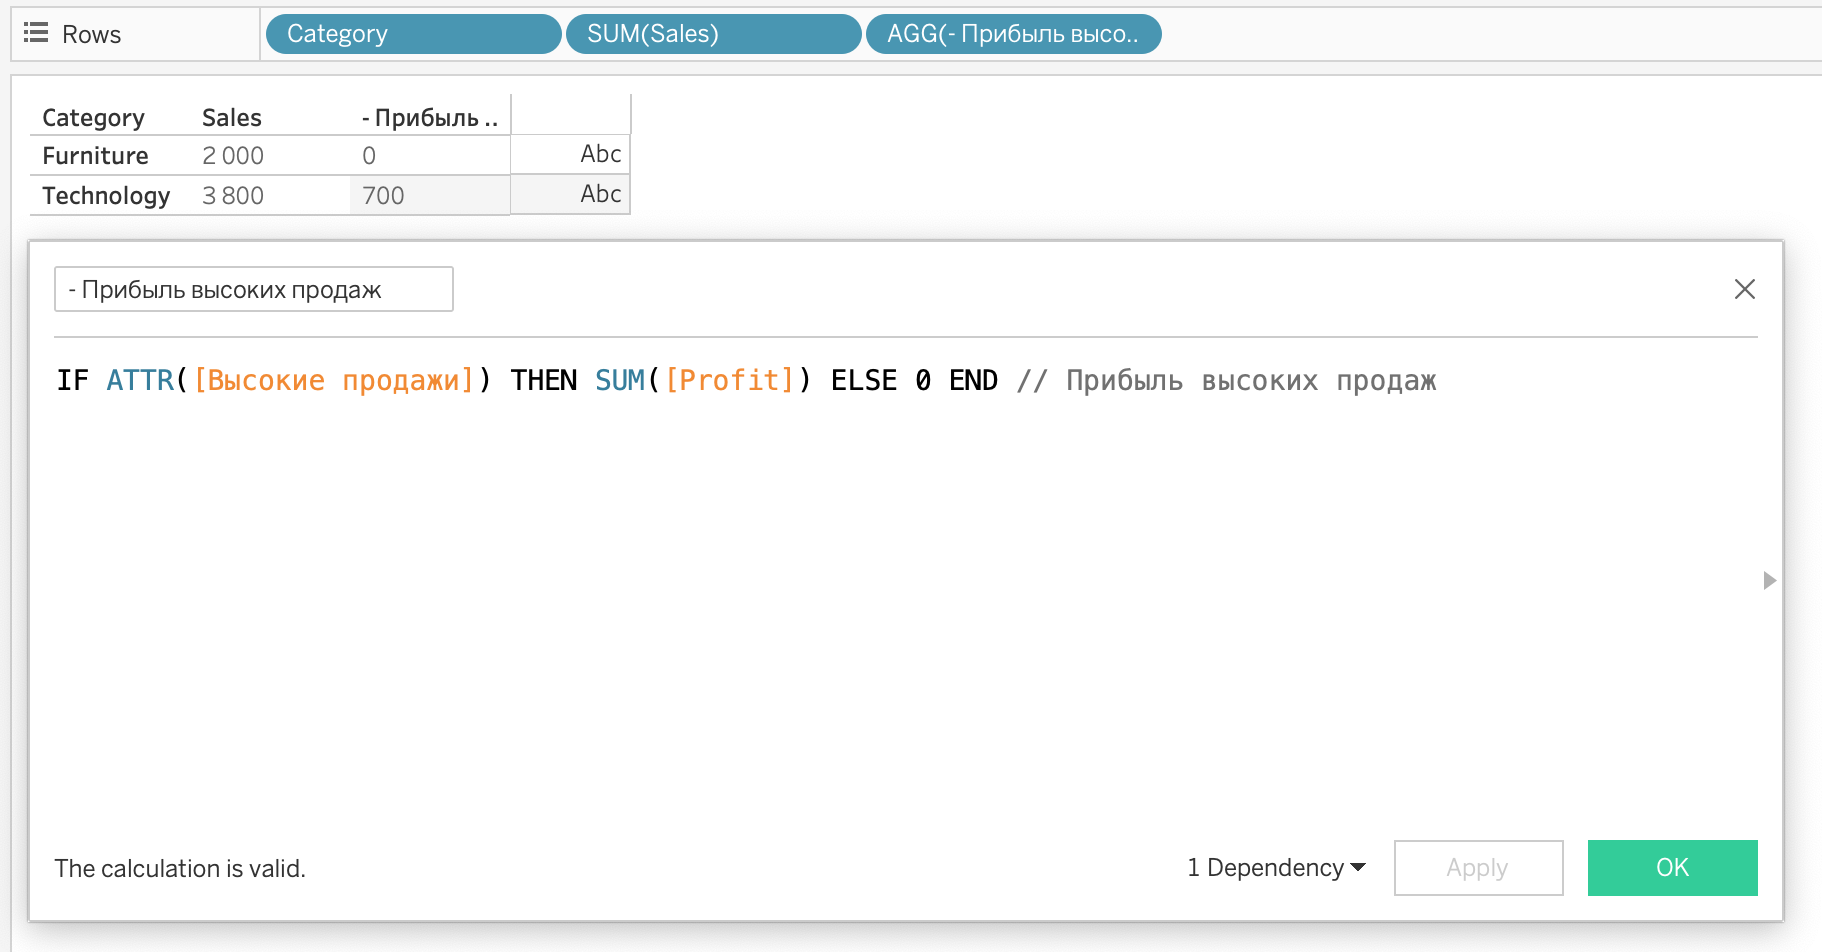

**Что получаем**: Прибыль только для Technology, Furniture обнулена.
* **Набор с параметром: Топ-N клиентов**  
  * **Условие**: Хотим, чтобы пользователь выбирал, сколько топ-клиентов видеть (например, топ-2).  
  * **Что делаем**:  
    * Создаём параметр "Топ N" (тип: Number, список: 1, 2, 3, по умолчанию: 2).
    * 
    *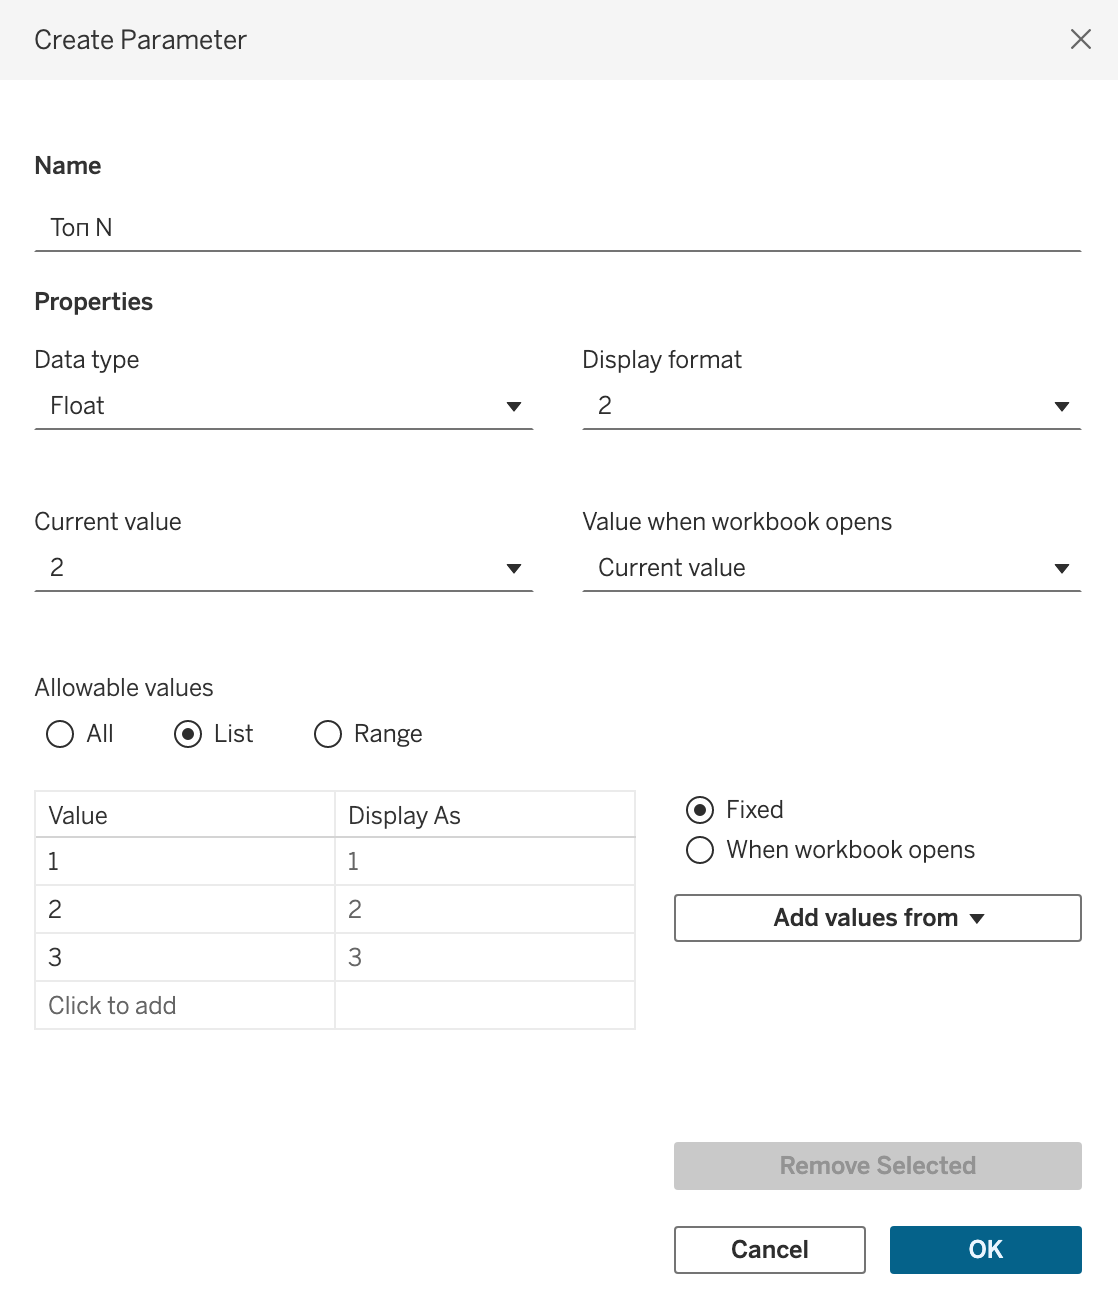
    * 
    * Показываем параметр (Show Parameter).  
    * Щёлкаем на [Customer Name] → Create Set → "Топ-N клиентов".  
    * Вкладка Top → By formula → RANK(SUM([Sales])) <= [Топ N].
    * 
    * 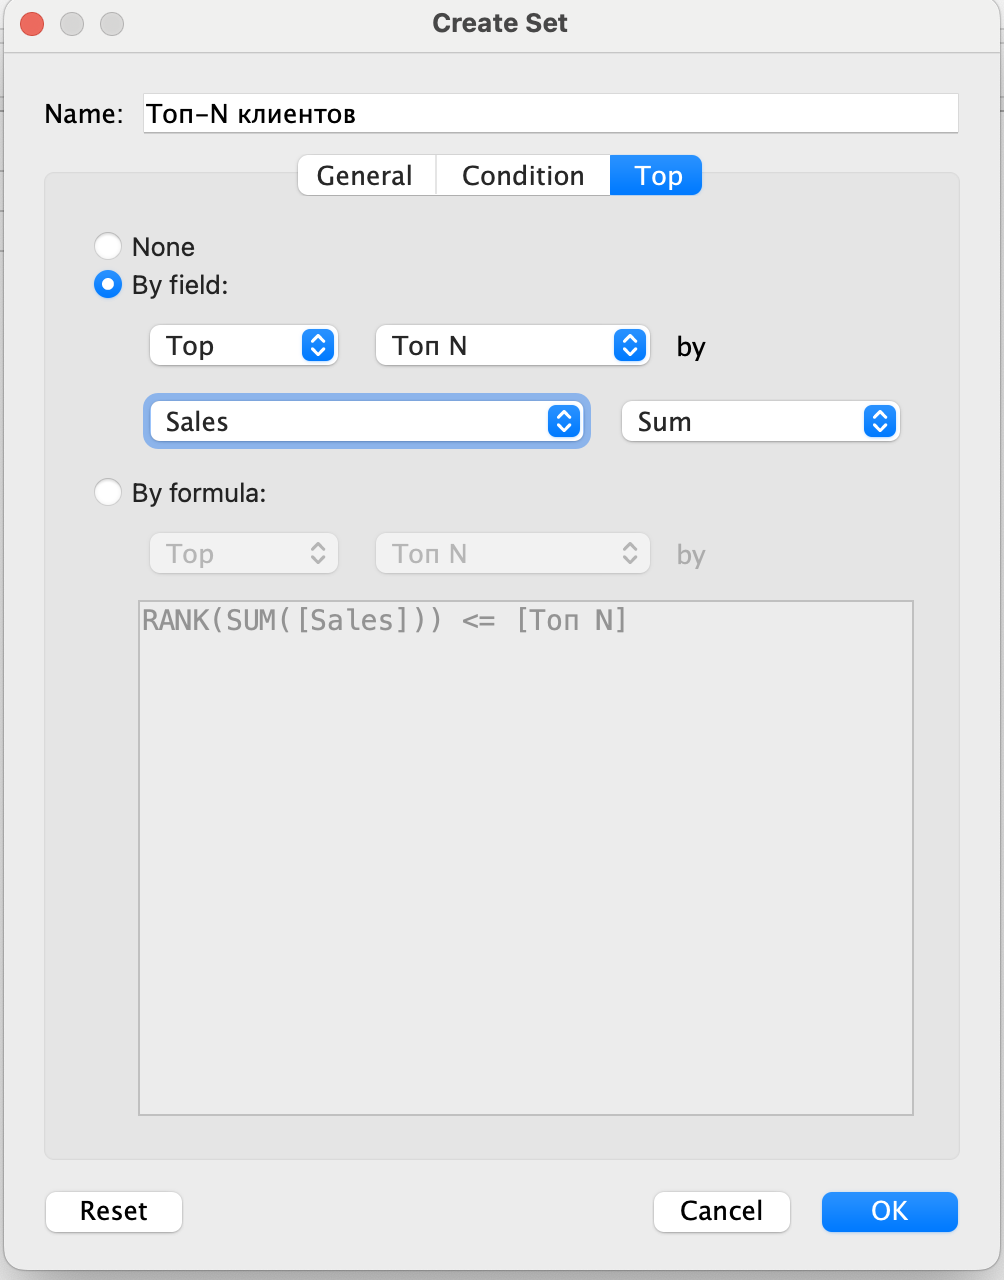
    * 
    * Создаём вычисляемое поле:   IF [Топ-N клиентов] THEN SUM([Sales]) ELSE 0 END // Продажи топ-N клиентов
  * **Как работает**: Пользователь выбирает число N, и набор включает N клиентов с наибольшими продажами.  
  * **Пример**: Пользователь выбрал 2.  
**Итоговая таблица** (визуализация с [Customer Name]):  
| Customer Name | SUM([Sales]) | IF [Топ-N клиентов] THEN SUM([Sales]) ELSE 0 END |
|:-:|:-:|:-:|
| Anna | 3000 | 3000 |
| Bob | 2000 | 2000 |
| Charlie | 800 | 0 |
**Что получаем**: Продажи для Anna и Bob. Если выбрать N=1, останется только Anna.

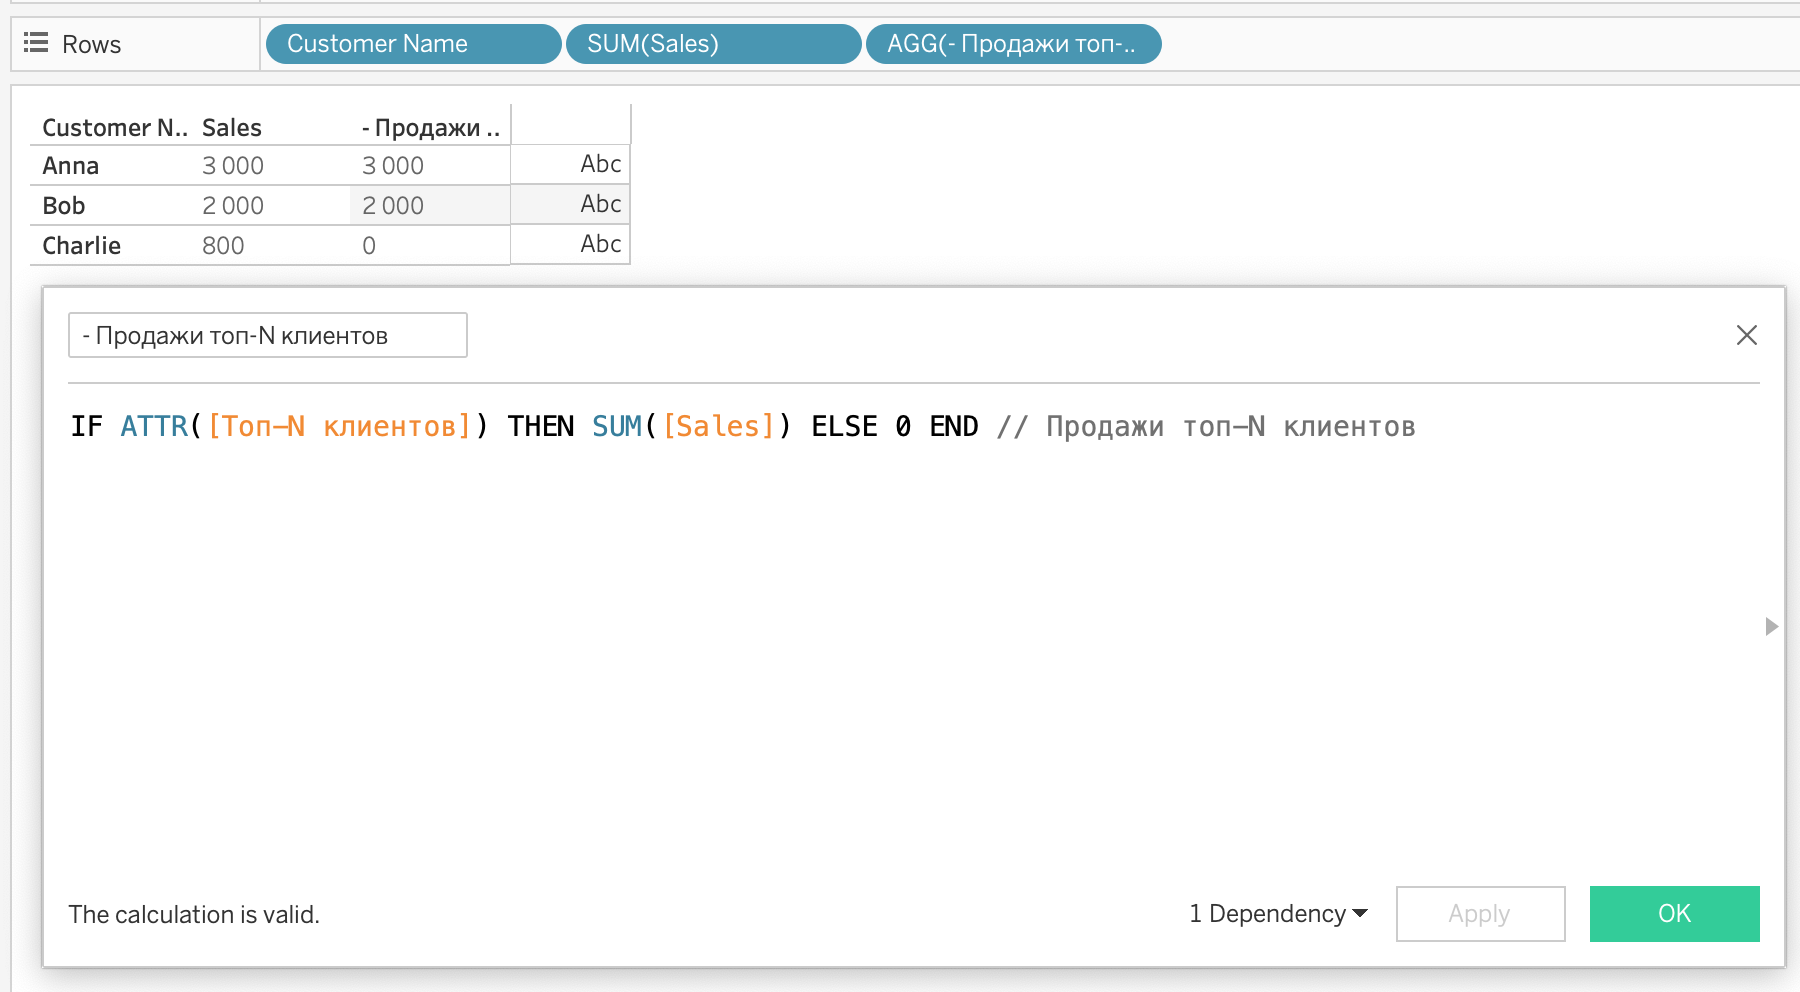

* **Набор с датами: Заказы за последний месяц**  
  * **Условие**: Хотим выделить клиентов с заказами за последний месяц от 23 июня 2025.  
  * **Что делаем**:  
    * Щёлкаем на [Customer Name] → Create Set → "Недавние клиенты".  
    * Вкладка Condition → By formula → DATEDIFF('month', MAX([Order Date]), TODAY()) <= 1.
    * 
    * 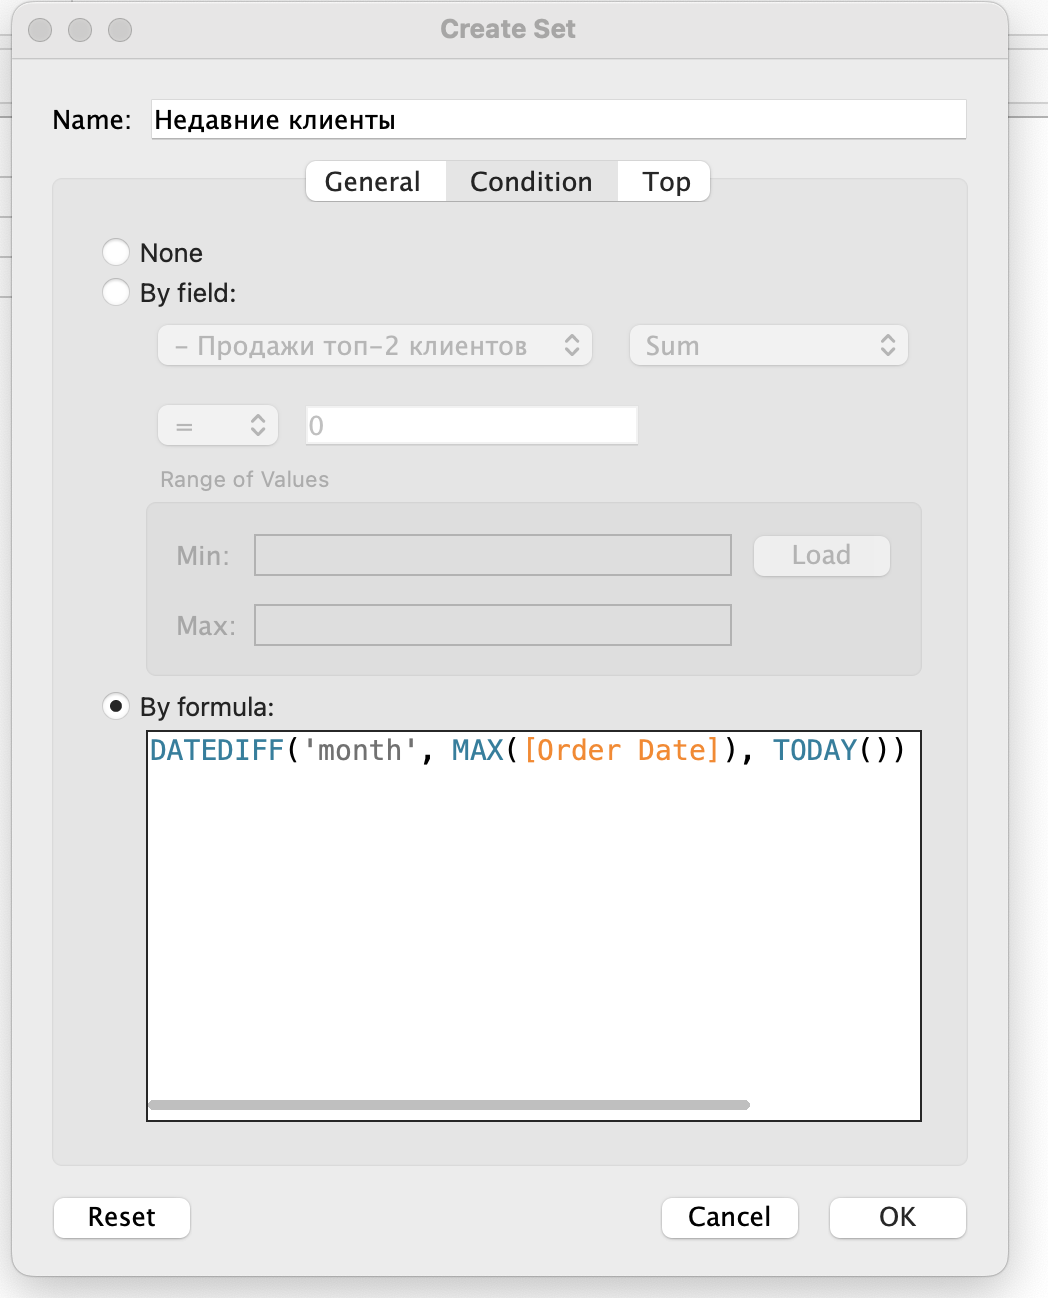
    * 
    * Создаём вычисляемое поле:   IF ATTR([Недавние клиенты]) THEN SUM([Sales]) ELSE 0 END // Продажи недавних клиентов
  * **Как работает**: Tableau проверяет, есть ли у клиента заказы за последний месяц, и включает их в набор.  
  * **Пример**: Заказ от 2025-03-01 (Bob).  
**Итоговая таблица** (визуализация с [Customer Name]):  
| Customer Name | SUM([Sales]) | IF [Недавние клиенты] THEN SUM([Sales]) ELSE 0 END |
|:-------------:|:------------:|:--------------------------------------------------:|
| Anna          | 3000         | 0                                                  |
| Bob           | 2000         | 2000                                               |
| Charlie       | 800          | 0                                                  |
**Что получаем**: Продажи только для Bob (2000), так как у него заказ в марте 2025.

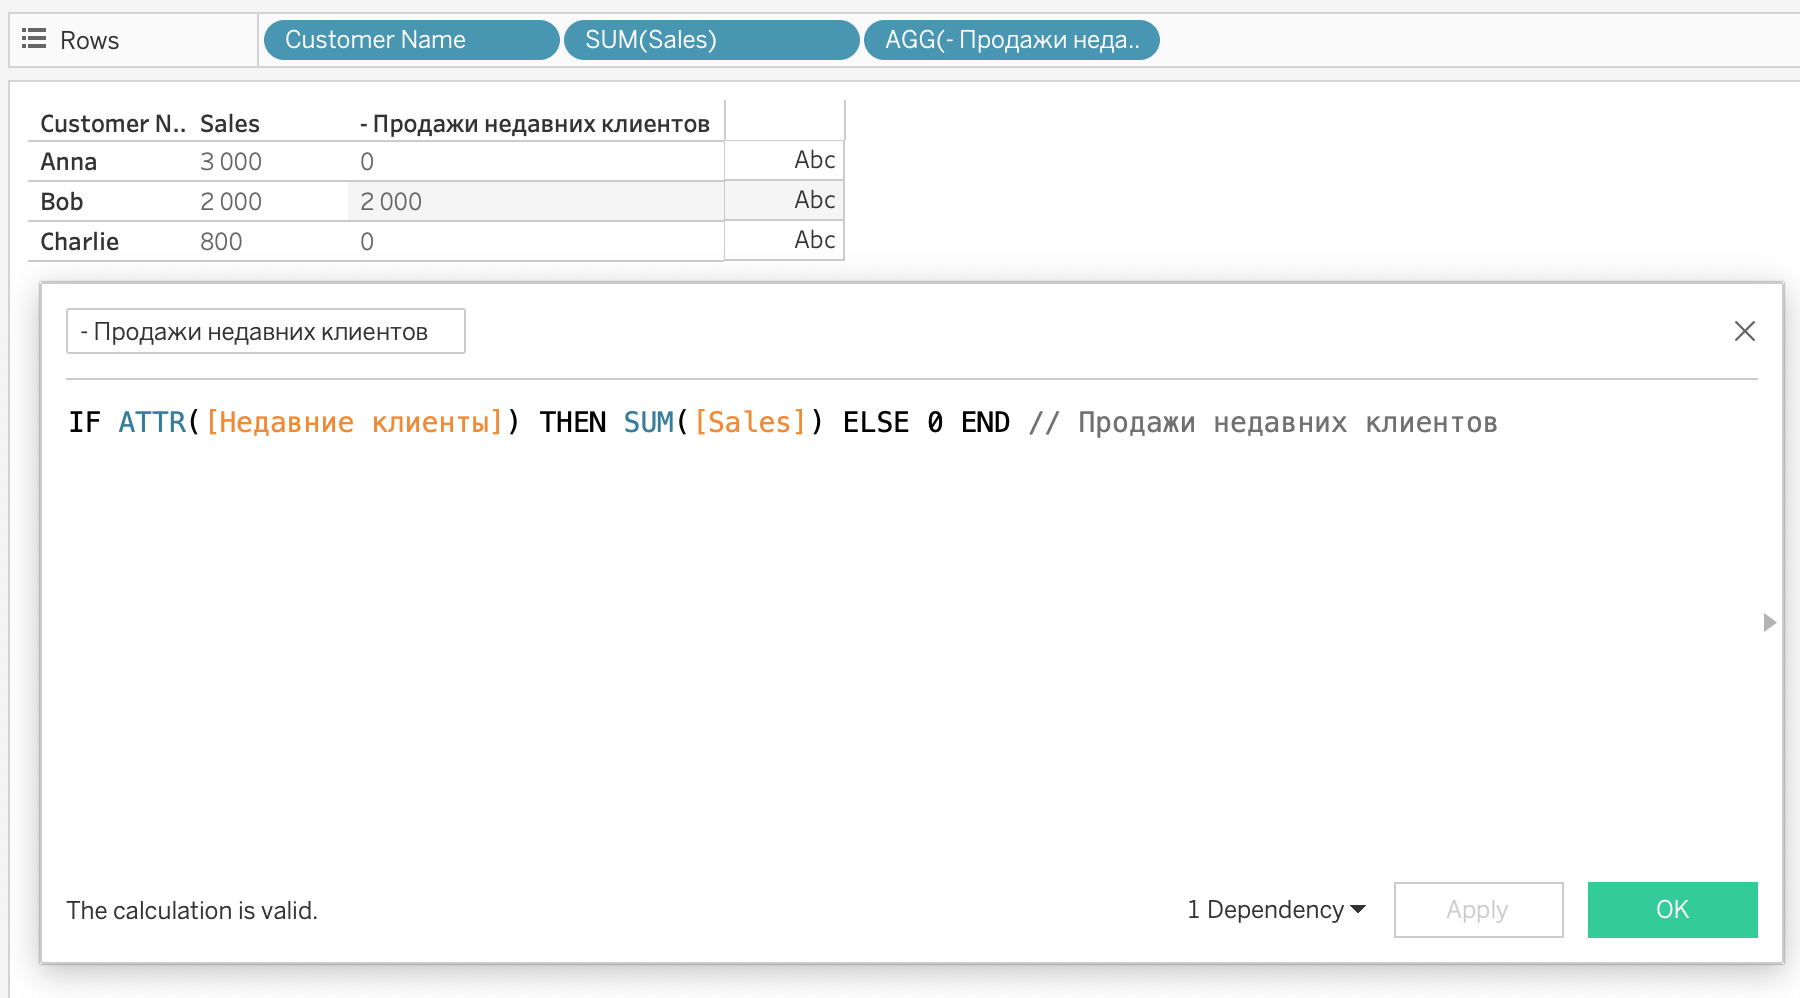

* **Набор: Сравнение In/Out для топ-2 клиентов**  
  * **Условие**: Хотим сравнить продажи топ-2 клиентов с остальными.  
  * **Что делаем**:  
    * Используем набор "Топ-2 клиентов" из примера 1.  
    * Перетаскиваем набор в Rows или Color для визуализации In/Out.
  * **Как работает**: Tableau делит данные на In (в наборе) и Out (вне набора).  
  * **Пример**: Набор включает Anna и Bob.  
**Итоговая таблица** (визуализация с [Топ-2 клиентов], [Customer Name]):  
| Топ-2 клиентов | Customer Name | SUM([Sales]) |
|:-:|:-:|:-:|
| In | Anna | 3000 |
| In | Bob | 2000 |
| Out | Charlie | 800 |
**Что получаем**: Сравнение продаж топ-2 клиентов (In) с остальными (Out).

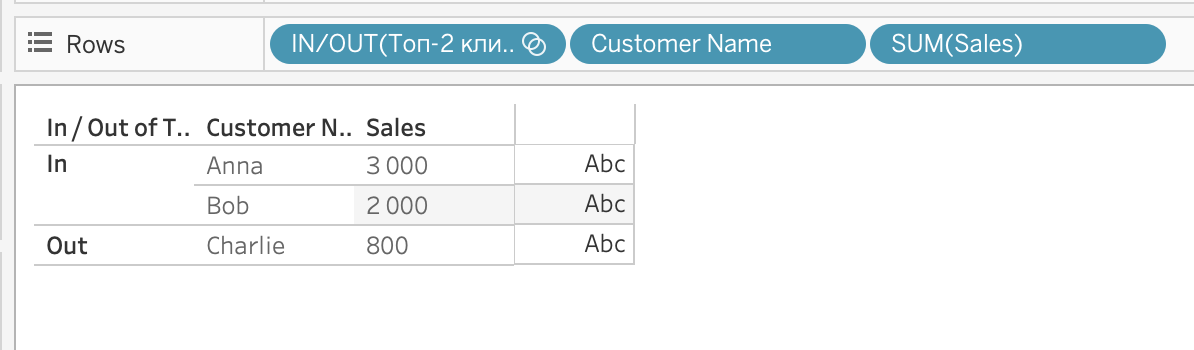

## Рекомендации для новичков
* **Думай, что хочешь выделить**: Решай, какие данные попадут в набор (например, топ-клиенты или прибыльные регионы).  
* **Тестируй в таблице**: Построй таблицу с [Customer Name] или [Region], добавь набор в Filters или формулу и проверь, как работают In/Out.  
* **Проверяй фильтры**: Убедись, что фильтры в рабочем листе или Data Source не ломают набор. Data Source фильтры (например, [Year] = 2025) ограничивают данные.  
* **Обрабатывай NULL**: Пиши ZN(SUM([Sales])) в формулах, чтобы не было пропусков (см. Модуль 2).  
* **Пиши комментарии**: Добавляй // Продажи топ-клиентов или /* Прибыльные регионы */ в формулы, чтобы всё было ясно.  
* **Сочетай с параметрами**: Используй параметры (см. Модуль 10) для динамичных наборов, например, топ-N клиентов.  
* **Не усложняй**: Если задача решается фильтром (см. Модуль 11) или SUM([Sales]) (см. Модуль 4), не создавай набор.  
* **Проверяй табличные вычисления**: Если набор основан на RANK, настрой область вычислений (см. Модуль 8), чтобы всё считалось правильно.

## Почему это важно?
Наборы — это как твой личный список "любимчиков" в данных. Они позволяют выделить важные данные (например, лучших клиентов или прибыльные категории) и сравнить их с остальными без лишних усилий. Наборы автоматически обновляются, если данные меняются, и легко встраиваются в формулы или дашборды. Освоишь наборы — сможешь строить анализы, которые сразу показывают, кто в топе и как они отличаются от остальных, делая твои отчёты крутыми и понятными.